# **BASELINE WORK FROM PS2**

In [2]:
## Import 

import sys
import time
import os
import math
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np

In [1]:
# BASELINE

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

# TAKEN DIRECTLY FROM PS2
# Run this code cell to train MNIST neural network. Do not modify!
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

# Train an MNIST neural network. Run this code cell.
class MNISTNet(nn.Module):
    def __init__(self, hidden=128):
      super(MNISTNet, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.hidden = hidden
      self.fc1 = nn.Linear(28*28*1, self.hidden)
      self.fc2 = nn.Linear(self.hidden, 10)

    def forward(self, x):
      x = x.view(-1, 28*28)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

def train_mnist(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test_mnist(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

model = MNISTNet()
device = torch.device("cpu")

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1_mnist = datasets.MNIST('./data_mnist', train=True, download=True,
                    transform=transform)
dataset2_mnist = datasets.MNIST('./data_mnist', train=False,
                    transform=transform)
train_loader_mnist = torch.utils.data.DataLoader(dataset1_mnist)
test_loader_mnist = torch.utils.data.DataLoader(dataset2_mnist)

optimizer = optim.Adam(model.parameters())



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data_mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data_mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data_mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_mnist/MNIST/raw



In [ ]:
## functions to show an image
def show_img(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img[0][0].numpy()
    plt.imshow(npimg, cmap='Greys')

In [ ]:
# BASELINE PERFORMANCE
optimizer = optim.Adam(model.parameters())

start_time = time.time()

scheduler = StepLR(optimizer, step_size=1, gamma=.1)
for epoch in range(1, 5):
    train_mnist(model, device, train_loader_mnist, optimizer, epoch)
    test_mnist(model, device, test_loader_mnist)
    scheduler.step()


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.191813
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.000036
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.000000
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.000102
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.000010
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.000000

Test set: Average loss: 0.3483, Accuracy: 9252/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.000291
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.000000
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.000000
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.000001
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.000013
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.000000

Test set: Average loss: 0.1188, Accuracy: 9705/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.012133
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.000000
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.000000
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.000001
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.000000
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.

# **EXPLORATION OF LSHASH**

In [ ]:
!pip install lshashpy3
from lshashpy3 import LSHash
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for lshashpy3: filename=lshashpy3-0.0.8-py3-none-any.whl size=8903 sha256=2ca80e2c3916994d706b7f099e7bd4ab1a43a2ade378527c1452cff4f53f49d8
  Stored in directory: /root/.cache/pip/wheels/32/9b/ae/27f94ba2cd85b1cd5af645fa78f90b703c9e1fb9e2b55a04e0
Successfully built lshashpy3


In [ ]:
# create 6-bit hashes for input data of 8 dimensions:
lsh = LSHash(6, 8, storage_config={ 'dict': None })

# index vector
lsh.index([2,3,4,5,6,7,8,9])

# index vector and extra data
print(lsh.index([10,12,99,1,5,31,2,3], extra_data="vec1"))
lsh.index([10,11,94,1,4,31,2,3], extra_data="vec2")

# query a data point
top_n = 2
nn = lsh.query([1,2,3,4,5,6,7,7], num_results=top_n, distance_func="euclidean")
print(len(nn))

# unpack vector, extra data and vectorial distance
top_n = 3
nn = lsh.query([10,12,99,1,5,30,1,1], distance_func="euclidean")
for ((vec,extra_data),distance) in nn:
  print(vec, extra_data, distance)

None
1
(10, 12, 99, 1, 5, 31, 2, 3) vec1 6
(10, 11, 94, 1, 4, 31, 2, 3) vec2 33


In [ ]:
lsh = LSHash(16, 784, 20)
lsh.index(dataset1_mnist[0][0].flatten().numpy())
nn = lsh.query(dataset1_mnist[0][0].flatten().numpy(), num_results=top_n, distance_func="euclidean")
for ((vec,extra_data),distance) in nn:
    print(extra_data, distance)

None 0.0


In [ ]:
lsh.hash_tables[0].storage.keys()

dict_keys(['1100110101110000'])

In [ ]:

start_time = time.time()
hashed_dataset1_mnist = np.array([])
lsh = LSHash(6, 784, 128)

for i, value in enumerate(dataset1_mnist):
  if i % 1000 == 0:
    print(i)
  lsh.index(value[0].flatten().numpy(), extra_data=(i, value[1]))

for i, value in enumerate(dataset2_mnist):
  if i % 1000 == 0:
    print(i)
  lsh.index(value[0].flatten().numpy(), extra_data=(i+len(dataset1_mnist), value[1]))


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Total training time: 443.03387117385864 seconds


In [ ]:
start_time = time.time()

hashed_values = {}
label_values = {}

for i, table in enumerate(lsh.hash_tables):
  print(i)
  for key in table.storage:
    decimal = int(key, 2)
    for value in table.storage[key]:
      index = value[1][0]
      label = value[1][1]

      curr_list = hashed_values.get(index, [])
      curr_list.append(decimal)

      if (label_values.get(index, -1) > 0) and label_values.get(index, -1) != label:
        print("BADBADBADBAD")
      label_values[index] = label 

      hashed_values[index] = curr_list
  

total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
Total training time: 19.026893615722656 seconds


In [ ]:
start_time = time.time()

hashed_train_x = np.array([hashed_values[0]])
hashed_train_y = np.array([label_values[0]])

for i in range(1, len(dataset1_mnist)):
  hashed_train_x = np.append(hashed_train_x, [hashed_values[i]], axis=0)
  hashed_train_y = np.append(hashed_train_y, label_values[i])

hashed_test_x = np.array([hashed_values[len(dataset1_mnist)]])
hashed_test_y = np.array([label_values[len(dataset1_mnist)]])

for i in range(len(dataset1_mnist)+1, len(dataset1_mnist)+len(dataset2_mnist)):
  hashed_test_x = np.append(hashed_test_x, [hashed_values[i]], axis=0)
  hashed_test_y = np.append(hashed_test_y, label_values[i])


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 289.5292716026306 seconds


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

start_time = time.time()

train_tensor_x = torch.Tensor(hashed_train_x) # transform to torch tensor
train_tensor_y = torch.Tensor(hashed_train_y)

# train_tensor_x = train_tensor_x.type(torch.LongTensor)
train_tensor_y = train_tensor_y.type(torch.LongTensor)

hashed_dataset1_mnist = TensorDataset(train_tensor_x, train_tensor_y) # create your datset

test_tensor_x = torch.Tensor(hashed_test_x) # transform to torch tensor
test_tensor_y = torch.Tensor(hashed_test_y)

# test_tensor_x = test_tensor_x.type(torch.LongTensor)
test_tensor_y = test_tensor_y.type(torch.LongTensor)

hashed_dataset2_mnist = TensorDataset(test_tensor_x,test_tensor_y) # create your datset


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 0.011150836944580078 seconds


In [ ]:
train_loader_hashed_mnist = torch.utils.data.DataLoader(hashed_dataset1_mnist)
test_loader_hashed_mnist = torch.utils.data.DataLoader(hashed_dataset2_mnist)

In [ ]:
class HashedMNISTNet(nn.Module):
    def __init__(self, hidden=128):
      super(HashedMNISTNet, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.hidden = hidden
      self.fc1 = nn.Linear(128*1, self.hidden)
      self.fc2 = nn.Linear(self.hidden, 10)

    def forward(self, x):
      x = x.view(-1, 128)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

def train_mnist(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test_mnist(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
start_time = time.time()

model = HashedMNISTNet()
device = torch.device("cpu")

optimizer = optim.Adam(model.parameters())

scheduler = StepLR(optimizer, step_size=1, gamma=.1)
for epoch in range(1, 5):
    train_mnist(model, device, train_loader_hashed_mnist, optimizer, epoch)
    test_mnist(model, device, test_loader_hashed_mnist)
    scheduler.step()

  
total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))


Train Epoch: 1 [0/60000 (0%)]	Loss: 18.155100
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.037339
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.023954
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.000923
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.565819
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.187714

Test set: Average loss: 0.9587, Accuracy: 7439/10000 (74%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.541676
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.004788
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.021508
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.000294
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.153680
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.065709

Test set: Average loss: 0.5803, Accuracy: 8263/10000 (83%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.076117
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.005045
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.057888
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.000446
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.131550
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0

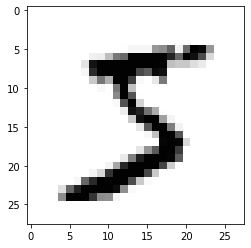

In [ ]:
show_img(dataset1_mnist[0])

# **AUGMENTING**

In [ ]:
def augment_image(img, size=6):
  new_image = img
  # print(new_image[0][0])
  left_index = np.random.randint(0, 28 - size)
  top_index = np.random.randint(0, 28-size)
  square_size = size
  for i in range(size):
    for j in range(size):
      new_image[0][0][i+top_index][j+left_index] = 3
  return new_image

# **HASHING WITH BINARY CODES**

In [ ]:
def get_hash(lsh, img):
  hashes = []
  planes = lsh.uniform_planes

  for plane in planes:
    hash = lsh._hash(plane, img[0].flatten().numpy().tolist())

    hash = list(hash)

    for i, val in enumerate(hash):
      hash[i] = int(hash[i])

    hashes = hashes + hash
  
  return np.array(hashes)

In [ ]:
get_hash(lsh, dataset1_mnist[0])

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
lsh = LSHash(8, 784, 20)


start_time = time.time()

hashed_dataset_train = []
mnist_labels_train = []

hashed_dataset_test = []
mnist_labels_test = []

for image in dataset1_mnist:
  hashed_dataset_train.append(get_hash(lsh, image))
  mnist_labels_train.append(image[1])

  #new_image = augment_image(image)
  #hashed_dataset_train.append(get_hash(lsh, new_image))
  #mnist_labels_train.append(image[1])


for image in dataset2_mnist:
  hashed_dataset_test.append(get_hash(lsh, image))
  mnist_labels_test.append(image[1])

total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 160.5141053199768 seconds


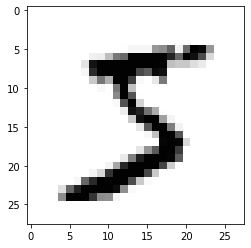

In [ ]:
show_img(dataset1_mnist[0])


In [ ]:
hashed_dataset_train = np.array(hashed_dataset_train)
mnist_labels_train = np.array(mnist_labels_train)

hashed_dataset_test = np.array(hashed_dataset_test)
mnist_labels_test = np.array(mnist_labels_test)

In [ ]:
len(hashed_dataset_train[0])

160

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

start_time = time.time()

train_tensor_x = torch.Tensor(hashed_dataset_train) # transform to torch tensor
train_tensor_y = torch.Tensor(mnist_labels_train)

# train_tensor_x = train_tensor_x.type(torch.LongTensor)
train_tensor_y = train_tensor_y.type(torch.LongTensor)

hashed_dataset1_mnist = TensorDataset(train_tensor_x, train_tensor_y) # create your datset

test_tensor_x = torch.Tensor(hashed_dataset_test) # transform to torch tensor
test_tensor_y = torch.Tensor(mnist_labels_test)

# test_tensor_x = test_tensor_x.type(torch.LongTensor)
test_tensor_y = test_tensor_y.type(torch.LongTensor)

hashed_dataset2_mnist = TensorDataset(test_tensor_x,test_tensor_y) # create your datset


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 0.03741908073425293 seconds


In [ ]:
train_loader_hashed_mnist = torch.utils.data.DataLoader(hashed_dataset1_mnist)
test_loader_hashed_mnist = torch.utils.data.DataLoader(hashed_dataset2_mnist)

In [ ]:
class HashedMNISTNet(nn.Module):
    def __init__(self, hidden=128):
      super(HashedMNISTNet, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.hidden = hidden
      self.fc1 = nn.Linear(8*20*1, self.hidden)
      self.fc2 = nn.Linear(self.hidden, 10)

    def forward(self, x):
      x = x.view(-1, 8*20)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

def train_mnist(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test_mnist(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
start_time = time.time()

hash_model = HashedMNISTNet()
device = torch.device("cpu")

optimizer = optim.Adam(hash_model.parameters())

scheduler = StepLR(optimizer, step_size=1, gamma=.1)
for epoch in range(1, 5):
    train_mnist(hash_model, device, train_loader_hashed_mnist, optimizer, epoch)
    test_mnist(hash_model, device, test_loader_hashed_mnist)
    scheduler.step()

  
total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.464187
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.006207
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.211246
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.041493
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.129371
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.002381

Test set: Average loss: 0.3522, Accuracy: 8905/10000 (89%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.255702
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.000061
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.000955
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.001060
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.001258
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.047938

Test set: Average loss: 0.2323, Accuracy: 9264/10000 (93%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.216819
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.000050
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.002444
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.001020
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.000642
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.

In [ ]:
  len(hashed_dataset1_mnist)

60000

In [ ]:
hashed_dataset1_mnist[0]

(tensor([1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
         1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
         1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
         0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
         0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
         0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
         1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 tensor(5))

# **MEMORY**

In [ ]:
!pip install memory-profiler 
from memory_profiler import memory_usage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
bits = 1

mods = list(model.modules())
for i in range(1,len(mods)):
    m = mods[i]
    p = list(m.parameters())
    sizes = []
    for j in range(len(p)):
        sizes.append(np.array(p[j].size()))

total_bits = 0
for i in range(len(sizes)):
    s = sizes[i]
    bits = np.prod(np.array(s))*bits
    total_bits += bits

print(total_bits) 

14080


In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchinfo import summary

batch_size = 10000
summary(model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
MNISTNet                                 [10000, 10]               --
├─Linear: 1-1                            [10000, 128]              100,480
├─Linear: 1-2                            [10000, 10]               1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (G): 1.02
Input size (MB): 31.36
Forward/backward pass size (MB): 11.04
Params size (MB): 0.41
Estimated Total Size (MB): 42.81

In [ ]:
batch_size = 10000
summary(hash_model, input_size=(batch_size, 1, 160, 1))

Layer (type:depth-idx)                   Output Shape              Param #
HashedMNISTNet                           [10000, 10]               --
├─Linear: 1-1                            [10000, 128]              20,608
├─Linear: 1-2                            [10000, 10]               1,290
Total params: 21,898
Trainable params: 21,898
Non-trainable params: 0
Total mult-adds (M): 218.98
Input size (MB): 6.40
Forward/backward pass size (MB): 11.04
Params size (MB): 0.09
Estimated Total Size (MB): 17.53

# **TESTING OF PARAMETERS**


In [ ]:
def get_hash(lsh, img):
  hashes = []
  planes = lsh.uniform_planes

  for plane in planes:
    hash = lsh._hash(plane, img[0].flatten().numpy().tolist())

    hash = list(hash)

    for i, val in enumerate(hash):
      hash[i] = int(hash[i])

    hashes = hashes + hash
  
  return np.array(hashes)

In [ ]:
get_hash(lsh, dataset1_mnist[0])

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1])

In [ ]:
lsh = LSHash(1, 784, 20)


start_time = time.time()

hashed_dataset_train_1 = []
mnist_labels_train_1 = []

hashed_dataset_test_1 = []
mnist_labels_test_1 = []

for image in dataset1_mnist:
  hashed_dataset_train_1.append(get_hash(lsh, image))
  mnist_labels_train_1.append(image[1])

  #new_image = augment_image(image)
  #hashed_dataset_train.append(get_hash(lsh, new_image))
  #mnist_labels_train.append(image[1])


for image in dataset2_mnist:
  hashed_dataset_test_1.append(get_hash(lsh, image))
  mnist_labels_test_1.append(image[1])

total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 173.80100297927856 seconds


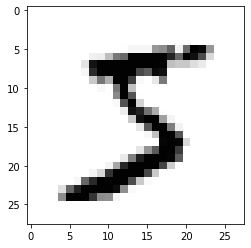

In [ ]:
show_img(dataset1_mnist[0])


In [ ]:
hashed_dataset_train_1 = np.array(hashed_dataset_train_1)
mnist_labels_train_1 = np.array(mnist_labels_train_1)

hashed_dataset_test_1 = np.array(hashed_dataset_test_1)
mnist_labels_test_1 = np.array(mnist_labels_test_1)

In [ ]:
len(hashed_dataset_train[0])

160

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

start_time = time.time()

train_tensor_x_1 = torch.Tensor(hashed_dataset_train_1) # transform to torch tensor
train_tensor_y_1 = torch.Tensor(mnist_labels_train_1)

# train_tensor_x = train_tensor_x.type(torch.LongTensor)
train_tensor_y_1 = train_tensor_y_1.type(torch.LongTensor)

hashed_dataset1_mnist_1 = TensorDataset(train_tensor_x_1, train_tensor_y_1) # create your datset

test_tensor_x_1 = torch.Tensor(hashed_dataset_test_1) # transform to torch tensor
test_tensor_y_1 = torch.Tensor(mnist_labels_test_1)

# test_tensor_x = test_tensor_x.type(torch.LongTensor)
test_tensor_y_1 = test_tensor_y_1.type(torch.LongTensor)

hashed_dataset2_mnist_1 = TensorDataset(test_tensor_x_1,test_tensor_y_1) # create your datset


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 0.005821704864501953 seconds


In [ ]:
train_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset1_mnist_1)
test_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset2_mnist_1)

In [ ]:
class HashedMNISTNet(nn.Module):
    def __init__(self, hidden=128):
      super(HashedMNISTNet, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.hidden = hidden
      self.fc1 = nn.Linear(1*20*1, self.hidden)
      self.fc2 = nn.Linear(self.hidden, 10)

    def forward(self, x):
      x = x.view(-1, 1*20)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

def train_mnist(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test_mnist(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
start_time = time.time()

hash_model_1 = HashedMNISTNet()
device = torch.device("cpu")

optimizer = optim.Adam(hash_model_1.parameters())

scheduler = StepLR(optimizer, step_size=1, gamma=.1)
for epoch in range(1, 5):
    train_mnist(hash_model_1, device, train_loader_hashed_mnist_1, optimizer, epoch)
    test_mnist(hash_model_1, device, test_loader_hashed_mnist_1)
    scheduler.step()

  
total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.596684
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.076542
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.113608
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.765119
Train Epoch: 1 [40000/60000 (67%)]	Loss: 1.738572
Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.358983

Test set: Average loss: 1.1034, Accuracy: 6321/10000 (63%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 6.897697
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.032530
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.243426
Train Epoch: 2 [30000/60000 (50%)]	Loss: 1.035918
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.617405
Train Epoch: 2 [50000/60000 (83%)]	Loss: 3.769749

Test set: Average loss: 0.9948, Accuracy: 6683/10000 (67%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 6.024643
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.023033
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.336056
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.992392
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.666775
Train Epoch: 3 [50000/60000 (83%)]	Loss: 3.

In [ ]:
lsh = LSHash(2, 784, 20)


start_time = time.time()

hashed_dataset_train_1 = []
mnist_labels_train_1 = []

hashed_dataset_test_1 = []
mnist_labels_test_1 = []

for image in dataset1_mnist:
  hashed_dataset_train_1.append(get_hash(lsh, image))
  mnist_labels_train_1.append(image[1])

  #new_image = augment_image(image)
  #hashed_dataset_train.append(get_hash(lsh, new_image))
  #mnist_labels_train.append(image[1])


for image in dataset2_mnist:
  hashed_dataset_test_1.append(get_hash(lsh, image))
  mnist_labels_test_1.append(image[1])

total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 140.0478105545044 seconds


In [ ]:
hashed_dataset_train_1 = np.array(hashed_dataset_train_1)
mnist_labels_train_1 = np.array(mnist_labels_train_1)

hashed_dataset_test_1 = np.array(hashed_dataset_test_1)
mnist_labels_test_1 = np.array(mnist_labels_test_1)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

start_time = time.time()

train_tensor_x_1 = torch.Tensor(hashed_dataset_train_1) # transform to torch tensor
train_tensor_y_1 = torch.Tensor(mnist_labels_train_1)

# train_tensor_x = train_tensor_x.type(torch.LongTensor)
train_tensor_y_1 = train_tensor_y_1.type(torch.LongTensor)

hashed_dataset1_mnist_1 = TensorDataset(train_tensor_x_1, train_tensor_y_1) # create your datset

test_tensor_x_1 = torch.Tensor(hashed_dataset_test_1) # transform to torch tensor
test_tensor_y_1 = torch.Tensor(mnist_labels_test_1)

# test_tensor_x = test_tensor_x.type(torch.LongTensor)
test_tensor_y_1 = test_tensor_y_1.type(torch.LongTensor)

hashed_dataset2_mnist_1 = TensorDataset(test_tensor_x_1,test_tensor_y_1) # create your datset


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 0.007135629653930664 seconds


In [ ]:
train_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset1_mnist_1)
test_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset2_mnist_1)

In [ ]:
class HashedMNISTNet(nn.Module):
    def __init__(self, hidden=128):
      super(HashedMNISTNet, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.hidden = hidden
      self.fc1 = nn.Linear(1*20*2, self.hidden)
      self.fc2 = nn.Linear(self.hidden, 10)

    def forward(self, x):
      x = x.view(-1, 2*20)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

def train_mnist(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test_mnist(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
start_time = time.time()

hash_model_1 = HashedMNISTNet()
device = torch.device("cpu")

optimizer = optim.Adam(hash_model_1.parameters())

scheduler = StepLR(optimizer, step_size=1, gamma=.1)
for epoch in range(1, 5):
    train_mnist(hash_model_1, device, train_loader_hashed_mnist_1, optimizer, epoch)
    test_mnist(hash_model_1, device, test_loader_hashed_mnist_1)
    scheduler.step()

  
total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.093778
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.278482
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.058583
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.466283
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.233273
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.468375

Test set: Average loss: 0.8497, Accuracy: 7250/10000 (72%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.043655
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.031625
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.214824
Train Epoch: 2 [30000/60000 (50%)]	Loss: 1.017920
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.066655
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.589179

Test set: Average loss: 0.6435, Accuracy: 7846/10000 (78%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.038585
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.034772
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.347036
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.674925
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.069044
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.

In [ ]:
lsh = LSHash(4, 784, 20)


start_time = time.time()

hashed_dataset_train_1 = []
mnist_labels_train_1 = []

hashed_dataset_test_1 = []
mnist_labels_test_1 = []

for image in dataset1_mnist:
  hashed_dataset_train_1.append(get_hash(lsh, image))
  mnist_labels_train_1.append(image[1])

  #new_image = augment_image(image)
  #hashed_dataset_train.append(get_hash(lsh, new_image))
  #mnist_labels_train.append(image[1])


for image in dataset2_mnist:
  hashed_dataset_test_1.append(get_hash(lsh, image))
  mnist_labels_test_1.append(image[1])

total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 159.7055480480194 seconds


In [ ]:
hashed_dataset_train_1 = np.array(hashed_dataset_train_1)
mnist_labels_train_1 = np.array(mnist_labels_train_1)

hashed_dataset_test_1 = np.array(hashed_dataset_test_1)
mnist_labels_test_1 = np.array(mnist_labels_test_1)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

start_time = time.time()

train_tensor_x_1 = torch.Tensor(hashed_dataset_train_1) # transform to torch tensor
train_tensor_y_1 = torch.Tensor(mnist_labels_train_1)

# train_tensor_x = train_tensor_x.type(torch.LongTensor)
train_tensor_y_1 = train_tensor_y_1.type(torch.LongTensor)

hashed_dataset1_mnist_1 = TensorDataset(train_tensor_x_1, train_tensor_y_1) # create your datset

test_tensor_x_1 = torch.Tensor(hashed_dataset_test_1) # transform to torch tensor
test_tensor_y_1 = torch.Tensor(mnist_labels_test_1)

# test_tensor_x = test_tensor_x.type(torch.LongTensor)
test_tensor_y_1 = test_tensor_y_1.type(torch.LongTensor)

hashed_dataset2_mnist_1 = TensorDataset(test_tensor_x_1,test_tensor_y_1) # create your datset


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 0.01573324203491211 seconds


In [ ]:
train_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset1_mnist_1)
test_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset2_mnist_1)

In [ ]:
class HashedMNISTNet(nn.Module):
    def __init__(self, hidden=128):
      super(HashedMNISTNet, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.hidden = hidden
      self.fc1 = nn.Linear(1*20*4, self.hidden)
      self.fc2 = nn.Linear(self.hidden, 10)

    def forward(self, x):
      x = x.view(-1, 4*20)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

def train_mnist(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test_mnist(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
start_time = time.time()

hash_model_1 = HashedMNISTNet()
device = torch.device("cpu")

optimizer = optim.Adam(hash_model_1.parameters())

scheduler = StepLR(optimizer, step_size=1, gamma=.1)
for epoch in range(1, 5):
    train_mnist(hash_model_1, device, train_loader_hashed_mnist_1, optimizer, epoch)
    test_mnist(hash_model_1, device, test_loader_hashed_mnist_1)
    scheduler.step()

  
total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.188493
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.005874
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.470455
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.151442
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.056024
Train Epoch: 1 [50000/60000 (83%)]	Loss: 1.292825

Test set: Average loss: 0.4653, Accuracy: 8510/10000 (85%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 3.908176
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.000119
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.696130
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.006373
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.001924
Train Epoch: 2 [50000/60000 (83%)]	Loss: 1.270410

Test set: Average loss: 0.3504, Accuracy: 8900/10000 (89%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 3.672068
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.000147
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.533002
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.005494
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.001457
Train Epoch: 3 [50000/60000 (83%)]	Loss: 1.

In [ ]:
lsh = LSHash(16, 784, 20)


start_time = time.time()

hashed_dataset_train_1 = []
mnist_labels_train_1 = []

hashed_dataset_test_1 = []
mnist_labels_test_1 = []

for image in dataset1_mnist:
  hashed_dataset_train_1.append(get_hash(lsh, image))
  mnist_labels_train_1.append(image[1])

  #new_image = augment_image(image)
  #hashed_dataset_train.append(get_hash(lsh, new_image))
  #mnist_labels_train.append(image[1])


for image in dataset2_mnist:
  hashed_dataset_test_1.append(get_hash(lsh, image))
  mnist_labels_test_1.append(image[1])

total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 351.39496397972107 seconds


In [ ]:
hashed_dataset_train_1 = np.array(hashed_dataset_train_1)
mnist_labels_train_1 = np.array(mnist_labels_train_1)

hashed_dataset_test_1 = np.array(hashed_dataset_test_1)
mnist_labels_test_1 = np.array(mnist_labels_test_1)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

start_time = time.time()

train_tensor_x_1 = torch.Tensor(hashed_dataset_train_1) # transform to torch tensor
train_tensor_y_1 = torch.Tensor(mnist_labels_train_1)

# train_tensor_x = train_tensor_x.type(torch.LongTensor)
train_tensor_y_1 = train_tensor_y_1.type(torch.LongTensor)

hashed_dataset1_mnist_1 = TensorDataset(train_tensor_x_1, train_tensor_y_1) # create your datset

test_tensor_x_1 = torch.Tensor(hashed_dataset_test_1) # transform to torch tensor
test_tensor_y_1 = torch.Tensor(mnist_labels_test_1)

# test_tensor_x = test_tensor_x.type(torch.LongTensor)
test_tensor_y_1 = test_tensor_y_1.type(torch.LongTensor)

hashed_dataset2_mnist_1 = TensorDataset(test_tensor_x_1,test_tensor_y_1) # create your datset


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 0.257434606552124 seconds


In [ ]:
train_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset1_mnist_1)
test_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset2_mnist_1)

In [ ]:
class HashedMNISTNet(nn.Module):
    def __init__(self, hidden=128):
      super(HashedMNISTNet, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.hidden = hidden
      self.fc1 = nn.Linear(1*20*16, self.hidden)
      self.fc2 = nn.Linear(self.hidden, 10)

    def forward(self, x):
      x = x.view(-1, 16*20)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

def train_mnist(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test_mnist(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
start_time = time.time()

hash_model_1 = HashedMNISTNet()
device = torch.device("cpu")

optimizer = optim.Adam(hash_model_1.parameters())

scheduler = StepLR(optimizer, step_size=1, gamma=.1)
for epoch in range(1, 5):
    train_mnist(hash_model_1, device, train_loader_hashed_mnist_1, optimizer, epoch)
    test_mnist(hash_model_1, device, test_loader_hashed_mnist_1)
    scheduler.step()

  
total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.428708
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.002504
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.000033
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.001285
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.000770
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.000044

Test set: Average loss: 0.2823, Accuracy: 9175/10000 (92%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.057711
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.000270
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.000040
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.000103
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.000422
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.000009

Test set: Average loss: 0.1750, Accuracy: 9493/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.002470
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.000183
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.000090
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.000167
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.000142
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.

In [ ]:
lsh = LSHash(32, 784, 20)


start_time = time.time()

hashed_dataset_train_1 = []
mnist_labels_train_1 = []

hashed_dataset_test_1 = []
mnist_labels_test_1 = []

for image in dataset1_mnist:
  hashed_dataset_train_1.append(get_hash(lsh, image))
  mnist_labels_train_1.append(image[1])

  #new_image = augment_image(image)
  #hashed_dataset_train.append(get_hash(lsh, new_image))
  #mnist_labels_train.append(image[1])


for image in dataset2_mnist:
  hashed_dataset_test_1.append(get_hash(lsh, image))
  mnist_labels_test_1.append(image[1])

total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 405.6617970466614 seconds


In [ ]:
hashed_dataset_train_1 = np.array(hashed_dataset_train_1)
mnist_labels_train_1 = np.array(mnist_labels_train_1)

hashed_dataset_test_1 = np.array(hashed_dataset_test_1)
mnist_labels_test_1 = np.array(mnist_labels_test_1)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

start_time = time.time()

train_tensor_x_1 = torch.Tensor(hashed_dataset_train_1) # transform to torch tensor
train_tensor_y_1 = torch.Tensor(mnist_labels_train_1)

# train_tensor_x = train_tensor_x.type(torch.LongTensor)
train_tensor_y_1 = train_tensor_y_1.type(torch.LongTensor)

hashed_dataset1_mnist_1 = TensorDataset(train_tensor_x_1, train_tensor_y_1) # create your datset

test_tensor_x_1 = torch.Tensor(hashed_dataset_test_1) # transform to torch tensor
test_tensor_y_1 = torch.Tensor(mnist_labels_test_1)

# test_tensor_x = test_tensor_x.type(torch.LongTensor)
test_tensor_y_1 = test_tensor_y_1.type(torch.LongTensor)

hashed_dataset2_mnist_1 = TensorDataset(test_tensor_x_1,test_tensor_y_1) # create your datset


total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))

Total training time: 0.2692852020263672 seconds


In [ ]:
train_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset1_mnist_1)
test_loader_hashed_mnist_1 = torch.utils.data.DataLoader(hashed_dataset2_mnist_1)

In [ ]:
class HashedMNISTNet(nn.Module):
    def __init__(self, hidden=128):
      super(HashedMNISTNet, self).__init__()

      # First 2D convolutional layer, taking in 1 input channel (image),
      # outputting 32 convolutional features, with a square kernel size of 3
      self.hidden = hidden
      self.fc1 = nn.Linear(1*20*32, self.hidden)
      self.fc2 = nn.Linear(self.hidden, 10)

    def forward(self, x):
      x = x.view(-1, 32*20)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      return F.log_softmax(x, dim=1)

def train_mnist(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test_mnist(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
start_time = time.time()

hash_model_1 = HashedMNISTNet()
device = torch.device("cpu")

optimizer = optim.Adam(hash_model_1.parameters())

scheduler = StepLR(optimizer, step_size=1, gamma=.1)
for epoch in range(1, 5):
    train_mnist(hash_model_1, device, train_loader_hashed_mnist_1, optimizer, epoch)
    test_mnist(hash_model_1, device, test_loader_hashed_mnist_1)
    scheduler.step()

  
total_time = time.time() - start_time
print('Total training time: {} seconds'.format(total_time))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.344232
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.007709
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.000016
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.001254
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.001332
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.005386

Test set: Average loss: 0.4380, Accuracy: 8824/10000 (88%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 3.464228
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.000000
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.000148
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.000239
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.000038
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.000026

Test set: Average loss: 0.1542, Accuracy: 9532/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.029568
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.000000
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.000079
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.000078
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.000022
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.

# **VISUALIZATION AND TRENDS**

In [ ]:
import matplotlib.pyplot as plt

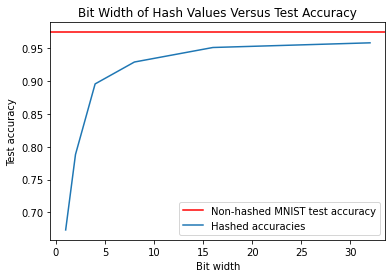

In [ ]:
x_values = np.array([1, 2, 4, 8, 16, 32])
y_values = np.array([0.6734, 0.7881, 0.8955, 0.9288, 0.9509, 0.9580])
# specifying horizontal line type
plt.axhline(y = 0.9741, color = 'r', label="Non-hashed MNIST test accuracy")
plt.title("Bit Width of Hash Values Versus Test Accuracy")
plt.xlabel("Bit width")
plt.ylabel("Test accuracy")
plt.plot(x_values, y_values, label="Hashed accuracies")
plt.legend()
plt.show()

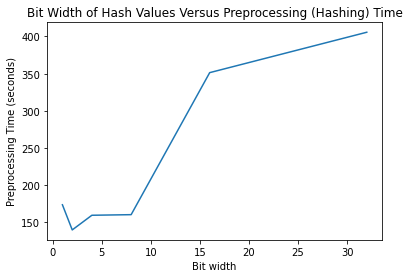

In [ ]:
preprocess_times = np.array([173.8, 140, 159.7, 160.5, 351.4, 405.7])

plt.plot(x_values, preprocess_times)

plt.title("Bit Width of Hash Values Versus Preprocessing (Hashing) Time")
plt.xlabel("Bit width")
plt.ylabel("Preprocessing Time (seconds)")
# plt.legend()
plt.show()

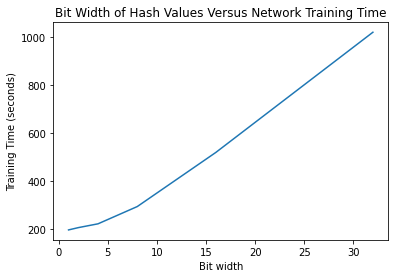

In [ ]:
training_times = np.array([196.8, 206.4, 222.2, 294.2, 519.8, 1020.9])

plt.plot(x_values, training_times)

plt.title("Bit Width of Hash Values Versus Network Training Time")
plt.xlabel("Bit width")
plt.ylabel("Training Time (seconds)")
# plt.legend()
plt.show()


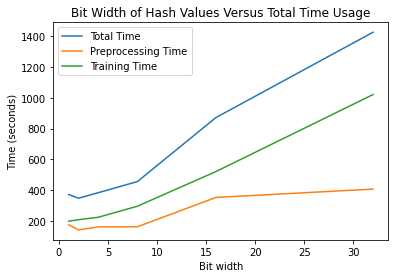

In [ ]:
total_times = preprocess_times + training_times
plt.plot(x_values, total_times, label="Total Time")

plt.plot(x_values, preprocess_times, label="Preprocessing Time")
plt.plot(x_values, training_times, label="Training Time")
plt.title("Bit Width of Hash Values Versus Total Time Usage")
plt.xlabel("Bit width")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()